# MUSIC RECOMMENDER ENGINE - 2
Data - Amazaon Digital Music

## KNN - Collaborative Filtering
KNN-based Collaborative Filtering Approach to Recommendations

In [2]:
import pandas as pd
import numpy as np

In [3]:
#For Extracting data from JSON file
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('/Users/siddharthmandgi/Desktop/2020-Summer-Honors-Research/Datasets/reviews_Digital_Music_5.json.gz')

df.to_csv('/Users/siddharthmandgi/Desktop/2020-Summer-Honors-Research/Datasets/Amazon_Digital_Music.csv')

In [5]:
df = pd.read_csv("/Users/siddharthmandgi/Desktop/2020-Summer-Honors-Research/Datasets/Amazon_Digital_Music.csv")
df = df.drop("Unnamed: 0", axis=1)
df = df.rename(columns = {"asin" : "Music_ID", "overall" : "ratings" })
df['ratings'] = df['ratings'].astype(int)
ratings = df['ratings'].unique().tolist()
df

,reviewerID,Music_ID,reviewerName,helpful,reviewText,ratings,summary,unixReviewTime,reviewTime
0,A3EBHHCZO6V2A4,5555991584,"Amaranth ""music fan""","[3, 3]","It's hard to believe ""Memory of Trees"" came ou...",5,Enya's last great album,1158019200,"09 12, 2006"
1,AZPWAXJG9OJXV,5555991584,bethtexas,"[0, 0]","A clasically-styled and introverted album, Mem...",5,Enya at her most elegant,991526400,"06 3, 2001"
2,A38IRL0X2T4DPF,5555991584,bob turnley,"[2, 2]",I never thought Enya would reach the sublime h...,5,The best so far,1058140800,"07 14, 2003"
3,A22IK3I6U76GX0,5555991584,Calle,"[1, 1]",This is the third review of an irish album I w...,5,Ireland produces good music.,957312000,"05 3, 2000"
4,A1AISPOIIHTHXX,5555991584,"Cloud ""...""","[1, 1]","Enya, despite being a successful recording art...",4,4.5; music to dream to,1200528000,"01 17, 2008"
...,...,...,...,...,...,...,...,...,...
64701,A1PQ1PESSO8CMO,B00KILDVEI,Ginger Christmas,"[0, 0]",I like the reggae sound a lot in this song. I ...,4,Cool song,1403568000,"06 24, 2014"
64702,A120RH58WVY4W6,B00KILDVEI,"Kelly Dunwell ""avid reader""","[0, 0]",I first heard this on Sirius and had to have i...,5,Great Song,1404864000,"07 9, 2014"
64703,A19VJ2IQLO50G0,B00KILDVEI,melinda,"[0, 1]","I absolutely love this song, it downloaded fin...",5,Five Stars,1405209600,"07 13, 2014"
64704,AUDSM2CTLLW1Q,B00KILDVEI,Patrick L. Randall,"[0, 0]","Reggae, island beats aren't really my cup of t...",3,Well-crafted song,1404864000,"07 9, 2014"


### Dataset of *Mean Ratings* & *No of Ratings* EDA

In [46]:
mean_ratings = df.groupby(by=["Music_ID"])['ratings'].mean()
num_reviews = pd.DataFrame(mean_ratings)
num_reviews['mean_ratings'] = num_reviews['ratings']
num_reviews = num_reviews.drop(['ratings'],axis=1)

number_of_reviews = df.groupby(by=["Music_ID"])['ratings'].count()
num_reviews['no_of_reviews'] = number_of_reviews
num_reviews

,mean_ratings,no_of_reviews
Music_ID,,
5555991584,4.739130,23
B0000000ZW,4.133333,15
B00000016T,4.851064,47
B00000016W,4.629630,135
B00000017R,4.650000,20
...,...,...
B00JJOG5D4,4.428571,7
B00JRBLSR2,3.875000,8
B00JTHVWO8,4.714286,7


## Visualizations of no of reviews

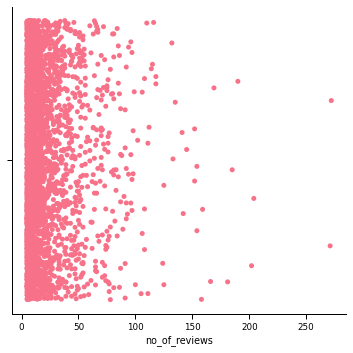

In [7]:
import seaborn as sns
sns.set_context('paper')
# create plot
ax = sns.catplot(x = 'no_of_reviews', data = num_reviews, palette = "husl")

From this visualization we conclude that majority of no_of_reviews lies in around the range: ***0-150***

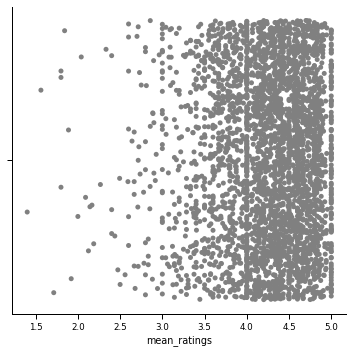

In [8]:
import seaborn as sns
sns.set_context('paper')
# create plot
ax = sns.catplot(x = 'mean_ratings', data = num_reviews, color='grey')

In [9]:
num_reviews['no_of_reviews'].describe()

count    3568.000000
mean       18.135090
std        21.639818
min         5.000000
25%         6.000000
50%        10.000000
75%        20.000000
max       272.000000
Name: no_of_reviews, dtype: float64

In [11]:
 num_reviews[num_reviews['no_of_reviews']==272]

,mean_ratings,no_of_reviews
Music_ID,,
B0007NFL18,2.558824,272


Music ID B0007NFL18 has the **max total no of reviews = 272** and a **mean rating = 2.558824**. **Average number of reviews per track = 18.135090**

### Including the no_of_reviews and mean_ratings in the original dataset

In [12]:
df['no_of_reviews'] = df.groupby('Music_ID')['Music_ID'].transform('count')
df['mean_ratings'] = df.groupby('Music_ID')['ratings'].transform('mean')
df

,reviewerID,Music_ID,reviewerName,helpful,reviewText,ratings,summary,unixReviewTime,reviewTime,no_of_reviews,mean_ratings
0,A3EBHHCZO6V2A4,5555991584,"Amaranth ""music fan""","[3, 3]","It's hard to believe ""Memory of Trees"" came ou...",5,Enya's last great album,1158019200,"09 12, 2006",23,4.73913
1,AZPWAXJG9OJXV,5555991584,bethtexas,"[0, 0]","A clasically-styled and introverted album, Mem...",5,Enya at her most elegant,991526400,"06 3, 2001",23,4.73913
2,A38IRL0X2T4DPF,5555991584,bob turnley,"[2, 2]",I never thought Enya would reach the sublime h...,5,The best so far,1058140800,"07 14, 2003",23,4.73913
3,A22IK3I6U76GX0,5555991584,Calle,"[1, 1]",This is the third review of an irish album I w...,5,Ireland produces good music.,957312000,"05 3, 2000",23,4.73913
4,A1AISPOIIHTHXX,5555991584,"Cloud ""...""","[1, 1]","Enya, despite being a successful recording art...",4,4.5; music to dream to,1200528000,"01 17, 2008",23,4.73913
...,...,...,...,...,...,...,...,...,...,...,...
64701,A1PQ1PESSO8CMO,B00KILDVEI,Ginger Christmas,"[0, 0]",I like the reggae sound a lot in this song. I ...,4,Cool song,1403568000,"06 24, 2014",5,3.60000
64702,A120RH58WVY4W6,B00KILDVEI,"Kelly Dunwell ""avid reader""","[0, 0]",I first heard this on Sirius and had to have i...,5,Great Song,1404864000,"07 9, 2014",5,3.60000
64703,A19VJ2IQLO50G0,B00KILDVEI,melinda,"[0, 1]","I absolutely love this song, it downloaded fin...",5,Five Stars,1405209600,"07 13, 2014",5,3.60000
64704,AUDSM2CTLLW1Q,B00KILDVEI,Patrick L. Randall,"[0, 0]","Reggae, island beats aren't really my cup of t...",3,Well-crafted song,1404864000,"07 9, 2014",5,3.60000


 ### Popularity Threshold
 Music tracks having number of reviews less than the threshold value are filtered out.

In [33]:
popularity_threshold = 20
rating_popular_track = df.query('no_of_reviews >= @popularity_threshold')
rating_popular_track

,reviewerID,Music_ID,reviewerName,helpful,reviewText,ratings,summary,unixReviewTime,reviewTime,no_of_reviews,mean_ratings
0,A3EBHHCZO6V2A4,5555991584,"Amaranth ""music fan""","[3, 3]","It's hard to believe ""Memory of Trees"" came ou...",5,Enya's last great album,1158019200,"09 12, 2006",23,4.739130
1,AZPWAXJG9OJXV,5555991584,bethtexas,"[0, 0]","A clasically-styled and introverted album, Mem...",5,Enya at her most elegant,991526400,"06 3, 2001",23,4.739130
2,A38IRL0X2T4DPF,5555991584,bob turnley,"[2, 2]",I never thought Enya would reach the sublime h...,5,The best so far,1058140800,"07 14, 2003",23,4.739130
3,A22IK3I6U76GX0,5555991584,Calle,"[1, 1]",This is the third review of an irish album I w...,5,Ireland produces good music.,957312000,"05 3, 2000",23,4.739130
4,A1AISPOIIHTHXX,5555991584,"Cloud ""...""","[1, 1]","Enya, despite being a successful recording art...",4,4.5; music to dream to,1200528000,"01 17, 2008",23,4.739130
...,...,...,...,...,...,...,...,...,...,...,...
64366,A3B01BU84T197B,B00FAEQ22G,M Nichols,"[0, 0]","Great lyrics, I'm not entirely sure after hear...",4,"Great lyrics, I'm not entirely sure after hear...",1386806400,"12 12, 2013",26,4.615385
64367,ADXNFRR2AI063,B00FAEQ22G,Mr. Music,"[0, 0]",This single changed the sound of pop and rock ...,5,LORDE IS THE NEW QUEEN OF POP AND ROCK!!!,1405555200,"07 17, 2014",26,4.615385
64368,A2ELQF6RB9PIM9,B00FAEQ22G,myluvrby,"[0, 0]",Cute catchy song and lyrics. Didn't like it at...,5,Cute song,1398988800,"05 2, 2014",26,4.615385
64369,A36EDWL4F3AASU,B00FAEQ22G,"robb sososikwitit ""el gran rabo""","[0, 0]",She's easy on the eyes and the song isn't bad ...,4,Lorde is hot,1392163200,"02 12, 2014",26,4.615385


 ### Pivot Table for Music_ID, reviewerID & ratings

In [37]:
music_features_df = rating_popular_track.pivot_table(index='Music_ID', columns ='reviewerID', values='ratings').fillna(0)
music_features_df

reviewerID,A08161909WK3HU7UYTMW,A1020L7BWW9RAX,A10323WWTFPSGP,A103KNDW8GN92L,A103W7ZPKGOCC9,A105188E1HFWRX,A105S56ODHGJEK,A1065Q31DNPRAN,A106BECWWKQIC9,A107R79K63CE30,...,AZSN1TO0JI87B,AZT9OGZODW8VW,AZTVHB938DIG5,AZTZ61W23JET0,AZVA13Q19KURR,AZVH70JMJ2IHX,AZVHFS4KQBQTK,AZWCAUCNLGL4H,AZY3MDFJJFI91,AZYZA8FDL48GD
Music_ID,,,,,,,,,,,,,,,,,,,,,
5555991584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000016T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000016W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000017R,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0000004UM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B00DYFCYSO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00EH49FRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00ERMICY8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Head and Tail of the Pivot table to show that every music track has been rated by atleast one or many users.

In [38]:
music_features_df.tail(5).replace(0, np.nan).bfill(1).iloc[:, 0]

Music_ID
B00DYFCYSO    5.0
B00EH49FRE    5.0
B00ERMICY8    5.0
B00F1CRRIU    5.0
B00FAEQ22G    5.0
Name: A08161909WK3HU7UYTMW, dtype: float64

In [39]:
music_features_df.head(5).replace(0, np.nan).bfill(1).iloc[:, 0]

Music_ID
5555991584    5.0
B00000016T    2.0
B00000016W    5.0
B00000017R    5.0
B0000004UM    5.0
Name: A08161909WK3HU7UYTMW, dtype: float64

### Sparse Matrix & KNN

In [40]:
from scipy.sparse import csr_matrix as csr
music_csr = csr(music_features_df.values)
from sklearn.neighbors import NearestNeighbors as NN
model = NN(metric = 'cosine', algorithm = 'brute')

model.fit(music_csr)

NearestNeighbors(algorithm='brute', metric='cosine')

In [41]:
query_index = np.random.choice(music_features_df.shape[0])
print(query_index)

741


In [42]:
music_features_df.shape

(932, 5354)

In [55]:
distances, indices = model.kneighbors(music_features_df, n_neighbors = 10)

### Top 5 Recommendations & their Resective Distances

In [59]:
for i in range(0,6):
        if i ==0:
            print('Recommendations for Music_ID: {0}\n'.format(music_features_df.index[query_index]))
        else:
            print('{0} : {1} with a cosine distance of {2}'.format(i, music_features_df.index[indices.flatten()[i]], distances.flatten()[i]))  
            

Recommendations for Music_ID: B000B5QWNI

1 : B000002IHQ with a cosine distance of 0.8520662093574536
2 : B000001DYY with a cosine distance of 0.8708843048496521
3 : B000001EXB with a cosine distance of 0.8754212979841561
4 : B00001QGQI with a cosine distance of 0.884166491884198
5 : B00006ISBT with a cosine distance of 0.8869802419571245


- The best case scenario: Cos0 = 1 which implies maximum similarity 
- The worst case scenario: Cos90 = 0 which implies maximum dissimilarity 

***Our distance values are around 0.88 which implies that our recommendations are very similar in features to our reviewed music track.***

 ## Weighted Average based Recommendations
 Considering weighted average of ratings to generate recommendations

<img src="algorithm.png" align="left" width="500" height="100"> 

- W = weighted score
- R = Average Rating
- C = the mean of all votes across the dataset
- v = no of votes or reviews for the movie
- m = minimum votes or number of reviews required to be in the top 250

***This algorithm is used by IMDB***

In [47]:
num_reviews

,mean_ratings,no_of_reviews
Music_ID,,
5555991584,4.739130,23
B0000000ZW,4.133333,15
B00000016T,4.851064,47
B00000016W,4.629630,135
B00000017R,4.650000,20
...,...,...
B00JJOG5D4,4.428571,7
B00JRBLSR2,3.875000,8
B00JTHVWO8,4.714286,7


In [48]:
v = num_reviews['no_of_reviews']
v

Music_ID
5555991584     23
B0000000ZW     15
B00000016T     47
B00000016W    135
B00000017R     20
             ... 
B00JJOG5D4      7
B00JRBLSR2      8
B00JTHVWO8      7
B00JYKU6BK     13
B00KILDVEI      5
Name: no_of_reviews, Length: 3568, dtype: int64

In [49]:
R = num_reviews['mean_ratings']
R

Music_ID
5555991584    4.739130
B0000000ZW    4.133333
B00000016T    4.851064
B00000016W    4.629630
B00000017R    4.650000
                ...   
B00JJOG5D4    4.428571
B00JRBLSR2    3.875000
B00JTHVWO8    4.714286
B00JYKU6BK    4.307692
B00KILDVEI    3.600000
Name: mean_ratings, Length: 3568, dtype: float64

In [50]:
C = num_reviews['mean_ratings'].mean()
C

4.2506453618359155

In [51]:
m = num_reviews['no_of_reviews'].quantile(0.70)
m

17.0

In [52]:
W = (R*v + C*m) / (v + m)
W

Music_ID
5555991584    4.531524
B0000000ZW    4.195655
B00000016T    4.691578
B00000016W    4.587243
B00000017R    4.466513
                ...   
B00JJOG5D4    4.302540
B00JRBLSR2    4.130439
B00JTHVWO8    4.385874
B00JYKU6BK    4.275366
B00KILDVEI    4.102771
Length: 3568, dtype: float64

In [53]:
num_reviews['weighted_average'] = W

### Generating recommendations from max to min weighted score...

In [54]:
recommendations = num_reviews.sort_values('weighted_average', ascending=False)
recommendations

,mean_ratings,no_of_reviews,weighted_average
Music_ID,,,
B000003AEK,4.882353,102,4.792109
B00003002C,4.890110,91,4.789453
B000002WR5,4.924242,66,4.786277
B0000025BA,4.876289,97,4.782991
B000001A6N,4.884615,78,4.771168
...,...,...,...
B0009SCVTG,2.494253,87,2.781355
B00004XOWM,2.473214,112,2.707449
B0007NFL18,2.558824,272,2.658342
